<a href="https://colab.research.google.com/github/PrayagRD/Online-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Online Retail Customer Segmentation. </u></b>

<p align="center">
  <img 
    src = "https://cdn.dribbble.com/users/506824/screenshots/1670206/media/71471d476effd234809de88eabd6229b.gif" width="1200" height="500"/>
</p>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

# **Importing Libraries**

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Load the dataset
df=pd.read_excel('/content/drive/MyDrive/Alma Better/Capstone/Capstone 4/Online Retail.xlsx')

In [4]:
#checking top 5 rows of dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
#checking bottom 5 rows of dataset
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
#checking shape of dataset
df.shape

(541909, 8)

In [ ]:
#basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**As we can see we have mos tof null values in customerID and all other columns looks fine. we can drop thode null values in customerID columns as we are making customer segmentation and keeping those null values make no sense**

In [ ]:
#columns of dataset
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

## **Data Cleaning**

**Checking for null values**

In [ ]:
#checking for null values in dataset
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

***Here we have null values present in our dataset like in CustomerID and Description.we can drop thode null values in customerID columns as we are making customer segmentation and keeping those null values make no sense***

In [ ]:
#dropping null values
df.dropna(inplace=True)

In [ ]:
#checking for missing values
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
#Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [ ]:
#checking shape
df.shape

(406829, 8)

***After removing null value from our dataset.***

***Now we have 406829 rows and 8 columns in our dataset.***

In [ ]:
#changing datatype
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [ ]:
df=df[~df['InvoiceNo'].str.contains('C')]

***Here we dropped some InvoiceNo which starts with 'c' because 'c' indicates a cancellation.***

In [ ]:
df.shape

(397924, 8)

In [ ]:
#checking summary
df.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


# **Exploratory data analysis**

**Description Name**

In [ ]:
Description_df=df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index': 'Description_Name'}, inplace=True)
Description_df.rename(columns={'Description': 'Count'}, inplace=True)
#top 5 Description Name
Description_df.head()

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1724
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1397


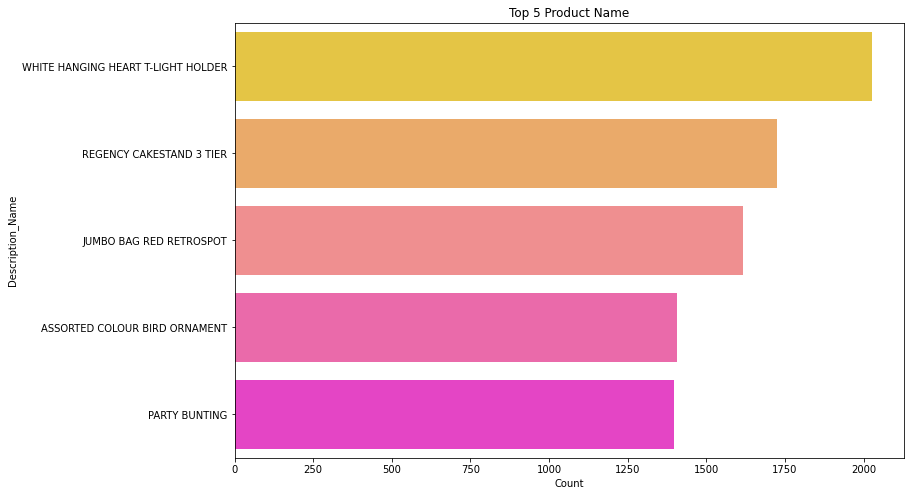

In [ ]:
#plot top 5 product name
plt.figure(figsize=(12,8))
plt.title('Top 5 Product Name')
sns.barplot(x='Count',y='Description_Name',data=Description_df[:5], palette='spring_r');

### **Top product based on maximum selling are :**
1.WHITE HANGING HEART T-LIGHT HOLDER

2.REGENCY CAKESTAND 3 TIER

3.JUMBO BAG RED RETROSPOT

4.PARTY BUNTING

5.LUNCH BAG RED RETROSPOT

In [ ]:
#bottom 5 description name
Description_df.tail()

,Description_Name,Count
3872,RUBY GLASS CLUSTER EARRINGS,1
3873,PINK CHRYSANTHEMUMS ART FLOWER,1
3874,72 CAKE CASES VINTAGE CHRISTMAS,1
3875,"WALL ART , THE MAGIC FOREST",1
3876,"PAPER CRAFT , LITTLE BIRDIE",1



### **Bottom 5 Product based on the selling are:**
1. RUBY GLASS CLUSTER EARRINGS

2. PINK CHRYSANTHEMUMS ART FLOWER

3. 72 CAKE CASES VINTAGE CHRISTMAS

4. WALL ART , THE MAGIC FOREST

5. PAPER CRAFT , LITTLE BIRDIE

**StockCode Name**

In [ ]:
StockCode_df=df['StockCode'].value_counts().reset_index()
StockCode_df.rename(columns={'index': 'StockCode_Name'}, inplace=True)
StockCode_df.rename(columns={'StockCode': 'Count'}, inplace=True)
#top 5 stockcode name
StockCode_df.head()

,StockCode_Name,Count
0,85123A,2035
1,22423,1724
2,85099B,1618
3,84879,1408
4,47566,1397


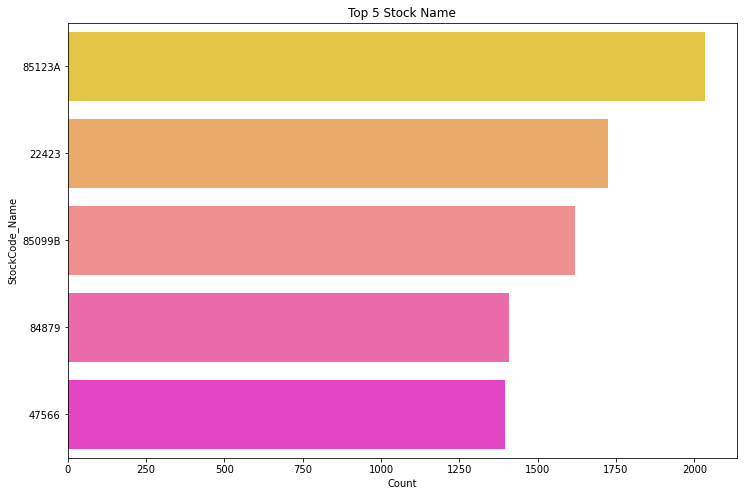

In [ ]:
#plot top 5 stockcode name
plt.figure(figsize=(12,8))
plt.title('Top 5 Stock Name')
sns.barplot(x='Count',y='StockCode_Name',data=StockCode_df[:5], palette='spring_r');

### **Top 5 Stock name based on selling are :**
1.85123A

2.22423

3.85099B 

4.84879

5.4756

In [ ]:
#bottom 5 stockcode name
StockCode_df.tail()

,StockCode_Name,Count
3660,90168,1
3661,90169,1
3662,90202A,1
3663,90118,1
3664,23843,1


**Country Name**

In [ ]:
country_df=df['Country'].value_counts().reset_index()
country_df.rename(columns={'index': 'Country_Name'}, inplace=True)
country_df.rename(columns={'Country': 'Count'}, inplace=True)
#top 5 country name
country_df.head()

,Country_Name,Count
0,United Kingdom,354345
1,Germany,9042
2,France,8342
3,EIRE,7238
4,Spain,2485


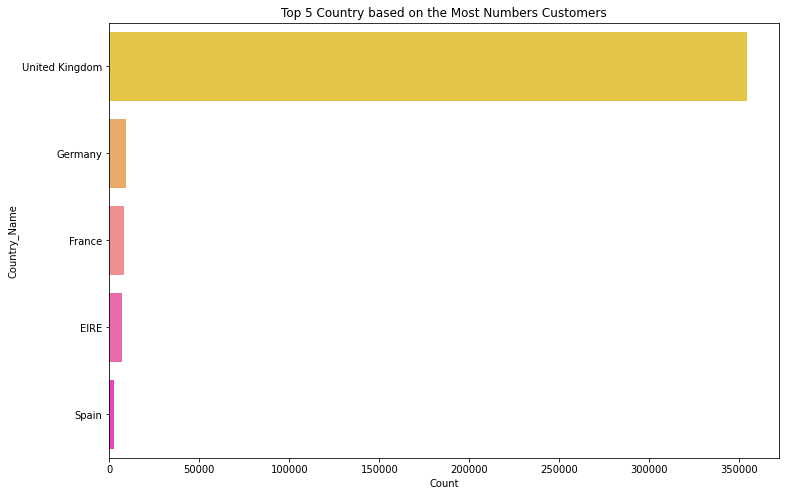

In [ ]:
#plot top 5 country name
plt.figure(figsize=(12,8))
plt.title('Top 5 Country based on the Most Numbers Customers')
sns.barplot(x='Count',y='Country_Name',data=country_df[:5], palette='spring_r');

***From this graph we can see that most of the customers are from United Kingdom that make sense aas company is from UK bases after that we have Germany ,France ,EIRE and Spain***

In [ ]:
#bottom 5 country name
country_df.tail()

,Country_Name,Count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


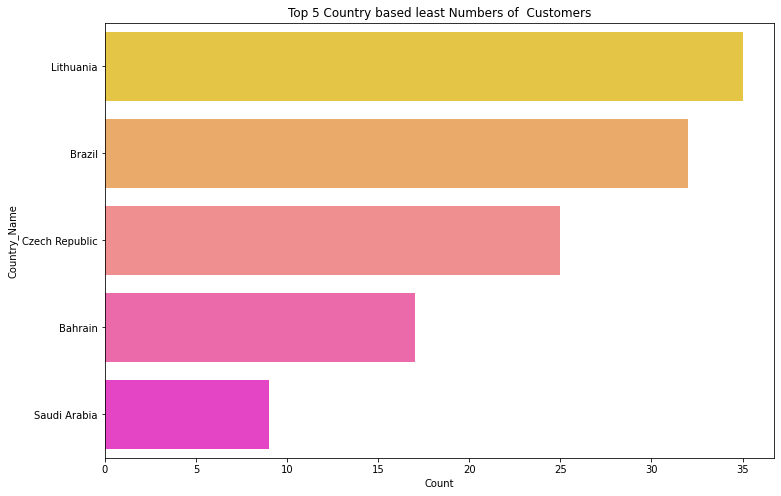

In [ ]:
#plot bottom 5 country name
plt.figure(figsize=(12,8))
plt.title('Top 5 Country based least Numbers of  Customers')
sns.barplot(x='Count',y='Country_Name',data=country_df[-5:], palette='spring_r');

***From this graph we can see that least number of customers from Lithuania,Brazil, Czech Republic ,Bahrain and Saudi Arabia***

**Distribution of Quantity**

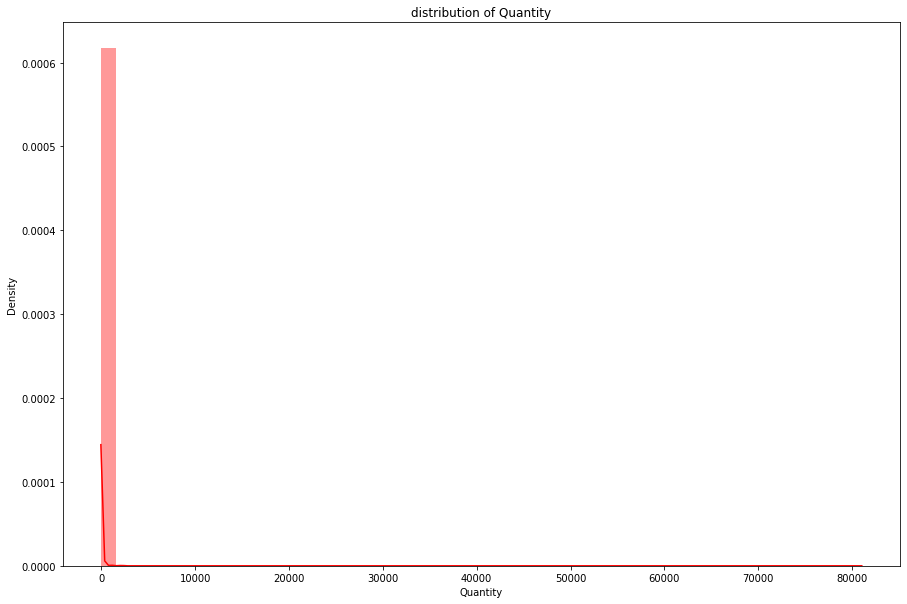

In [ ]:
#distribution of Quantity
plt.figure(figsize=(15,10))
plt.title('distribution of Quantity')
sns.distplot(df['Quantity'],color="r");

***Here we can see that its a Positively skewed (or right-skewed) distribution. It is a type of distribution in which most values are clustered around the left tail of the distribution***

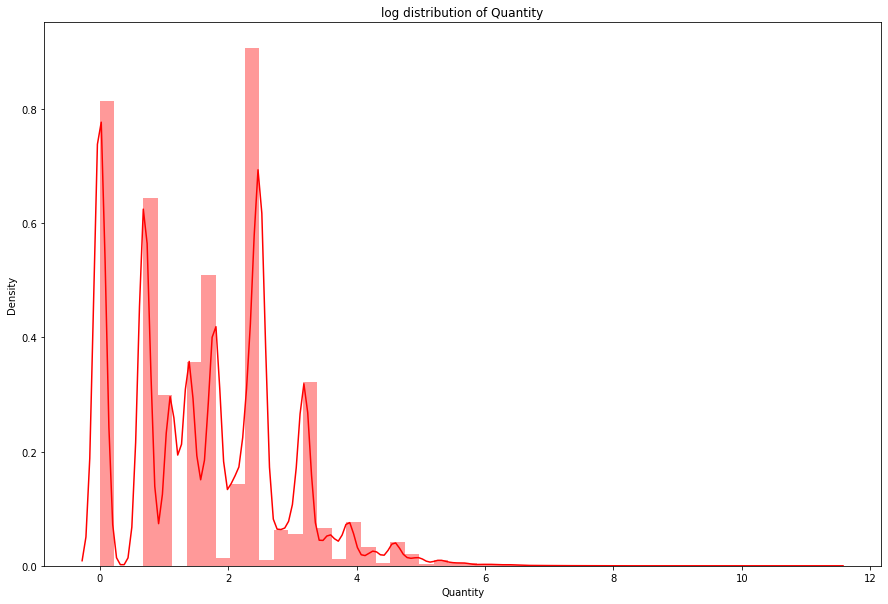

In [ ]:
#transforming skewed distribution to symmetrical distribution
plt.figure(figsize=(15,10))
plt.title('log distribution of Quantity')
sns.distplot(np.log(df['Quantity']),color="r");

**Distribution of Unit Price**

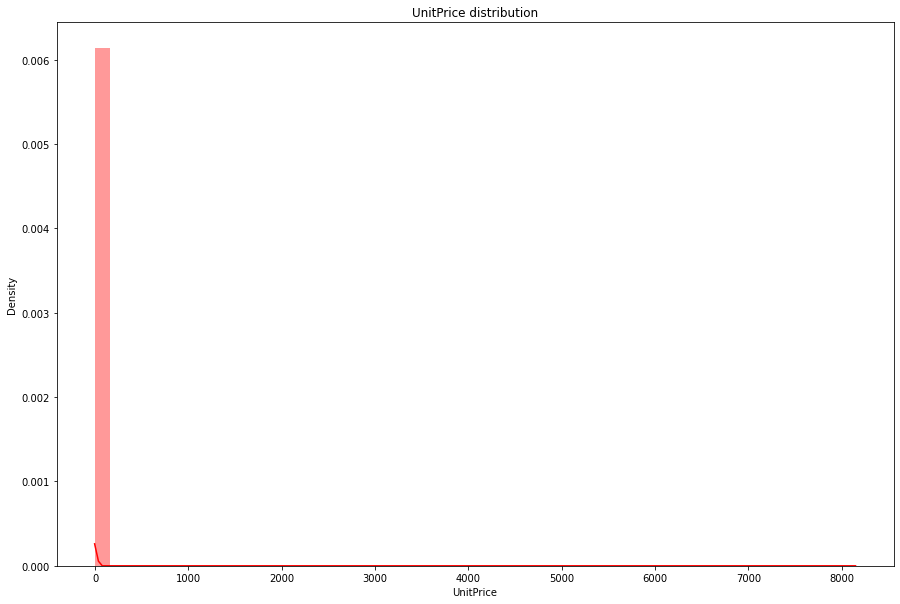

In [ ]:
#distribution of unit price
plt.figure(figsize=(15,10))
plt.title('UnitPrice distribution')
sns.distplot(df['UnitPrice'],color="r")

***From the distribution of unit price, we can say that most items have a lower price range.***

> Indented block



In [ ]:
#checking for unit price less than 0
df[df['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


# **Feature engineering**

In [ ]:
#Converting InvoiceDate columns into date time format
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

In [ ]:
#Creating a new features from Invoicedate
df['Month']=df['InvoiceDate'].dt.month_name()
df['Day']=df['InvoiceDate'].dt.day_name()
df['Hour']=df['InvoiceDate'].dt.hour

In [ ]:
#Creating a new feature TotalAmount from product of Quantity and Unitprice
df['TotalAmount']=df['Quantity']*df['UnitPrice']

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Hour,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,December,Wednesday,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,December,Wednesday,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,8,20.34


**Distribution of total amount**

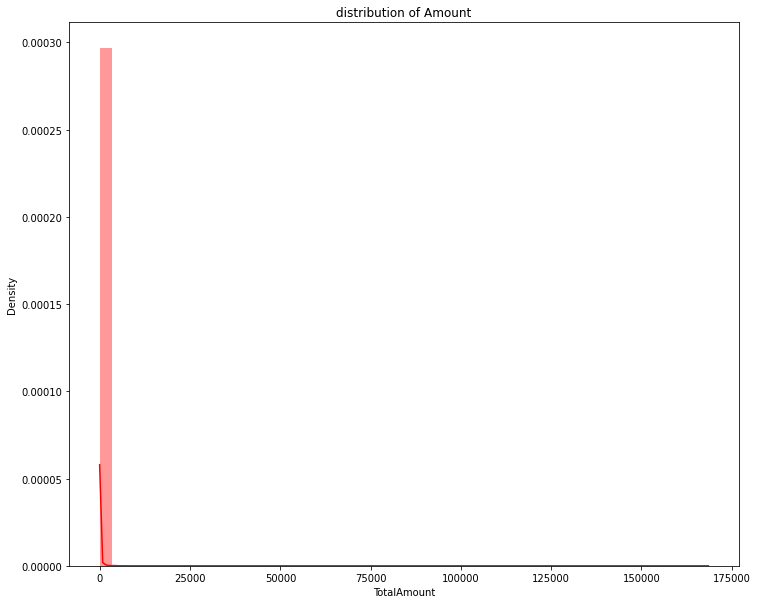

In [ ]:
#checking distribution for Totalamount
plt.figure(figsize=(12,10))
plt.title('distribution of Amount')
sns.distplot(df['TotalAmount'],color="r");

**Months**

In [ ]:
#creating month dataframe
month_df=df['Month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'Month': 'Count'}, inplace=True)
month_df

,Month_Name,Count
0,November,64545
1,October,49557
2,December,43464
3,September,40030
4,May,28322
5,June,27185
6,March,27177
7,August,27013
8,July,26827
9,April,22644


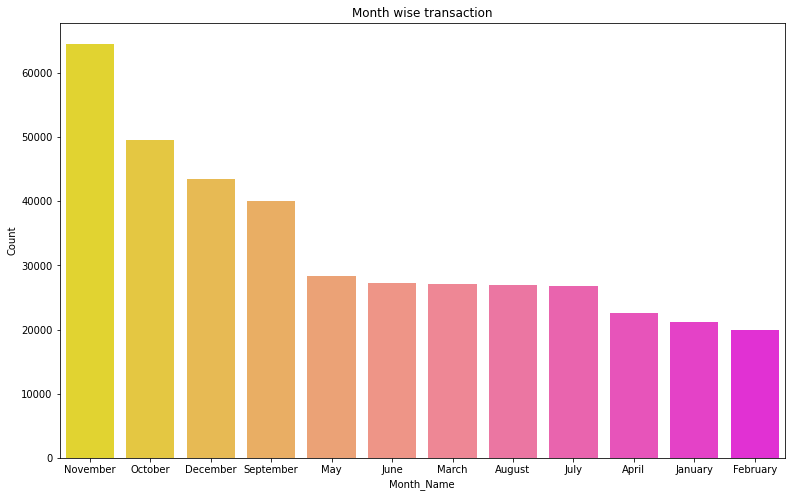

In [ ]:
#plotting for month
plt.figure(figsize=(13,8))
plt.title('Month wise transaction')
sns.barplot(x='Month_Name',y='Count',data=month_df,palette='spring_r');

♦ ***Most numbers of customers have purchased the gifts in the month of November, October and December.As we all know they have festive season in end of the year as well new year to celebrate so we have highest numbers of transaction in november, october, december as company have most of the customer wholesales who are keeping stocks for festive season.***

♦ ***Least numbers of purchasing are in the month of April and February.***

**Days**

In [ ]:
#creating day dataframe
day_df=df['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)
day_df.rename(columns={'Day': 'Count'}, inplace=True)
day_df

,Day_Name,Count
0,Thursday,80052
1,Wednesday,68888
2,Tuesday,66476
3,Monday,64899
4,Sunday,62775
5,Friday,54834


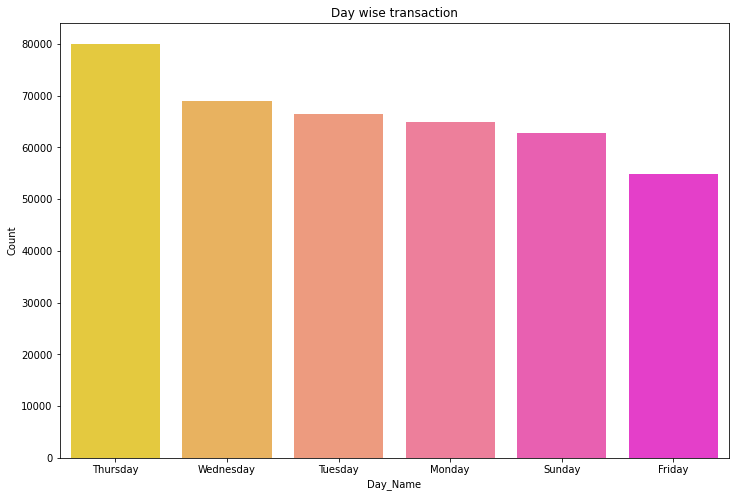

In [ ]:
#plotting for days
plt.figure(figsize=(12,8))
plt.title('Day wise transaction')
sns.barplot(x='Day_Name',y='Count',data=day_df, palette='spring_r');

**We can see the maximum number of transaction are for thursday but we can also see there are no transaction on saturday at this point I have no idea why but there can be reasons porbably data is not availble for saturdays or no transactions happened on saturday.**

**Most of the customers have purchased the items in Thursday ,Wednesday and Tuesday.**

**Hour**

In [ ]:
#Creating hour dataframe
hour_df=df['Hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hours'}, inplace=True)
hour_df.rename(columns={'Hour': 'Count'}, inplace=True)
hour_df

,Hours,Count
0,12,72069
1,13,64031
2,14,54127
3,11,49092
4,15,45372
5,10,37999
6,16,24093
7,9,21945
8,17,13072
9,8,8691


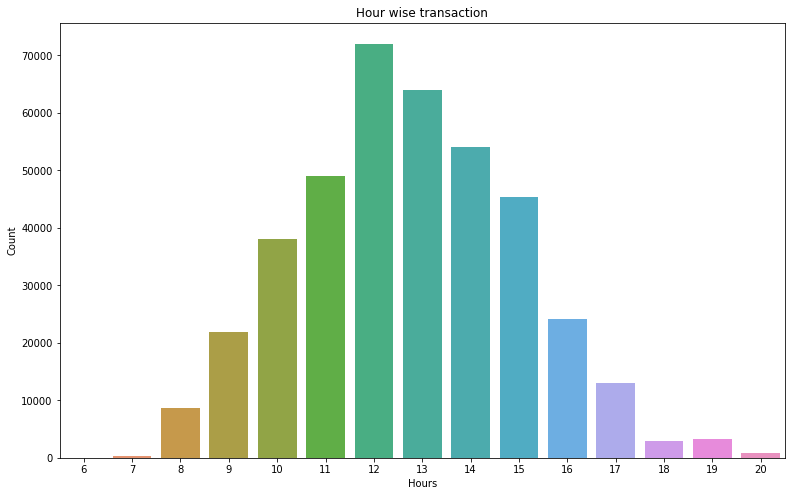

In [ ]:
#plotting for hour
plt.figure(figsize=(13,8))
plt.title('Hour wise transaction')
sns.barplot(x='Hours',y='Count',data=hour_df);

**From the above graph we can say that most numbers of purchasing is done between 12pm clock to 3pm.**

In [ ]:
#dividing hours into morning, afternoon and evening
def time_type(time):
  if(time>=6 and time<=11):
    return 'Morning'
  elif(time>=12 and time<=17):
    return 'Afternoon'
  else:
    return 'Evening'

In [ ]:
#applying function we created on hour column
df['Time_type']=df['Hour'].apply(time_type)

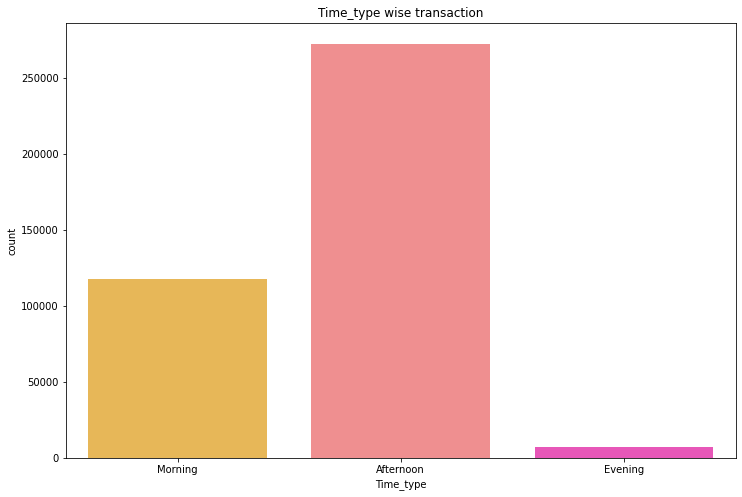

In [ ]:
#plotting for time type
plt.figure(figsize=(12,8))
plt.title('Time_type wise transaction')
sns.countplot(x='Time_type',data=df, palette='spring_r');

 ***Most of the customers have purchased the items in Afternoon.*** 

***Moderate numbers of customers have purchased the items in Morning and least numbers of customers have purchased the items in Evening.To increasse transacction at evening we can do one thing provide the offers/discounts at evening***

# **Create the RFM model (Recency, Frequency,Monetary value)**

### **RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in retail and professional services industries.**

**RFM stands for the three dimensions:**

### **Recency – How recently did the customer purchase?**

### **Frequency – How often do they purchase?**

### **Monetary – How much do they spend?**

**Recency** - In order to find the recency value of each customer, we need to determine the last invoice date as the current date and subtract the last purchasing date of each customer from this date.

**Frequency** - In order to find the frequency value of each customer, we need to determine how many times the customers make purchases.

**Monetary** - In order to find the monetary value of each customer, we need to determine how much do the customers spend on purchases.

In [ ]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [ ]:
#Descriptive Statistics (Recency)
rfm_df.Recency.describe()

count    4339.000000
mean       92.041484
std       100.007757
min         0.000000
25%        17.000000
50%        50.000000
75%       141.500000
max       373.000000
Name: Recency, dtype: float64

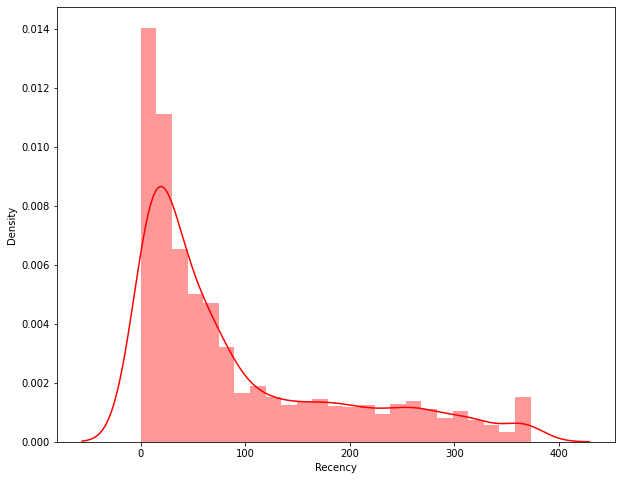

In [ ]:
#Recency distribution plot
import seaborn as sns
x = rfm_df['Recency']
plt.figure(figsize=(10,8))
sns.distplot(x,color='r');

In [ ]:
#Descriptive Statistics (Frequency)
rfm_df.Frequency.describe()

count    4339.000000
mean       91.708689
std       228.792852
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7847.000000
Name: Frequency, dtype: float64

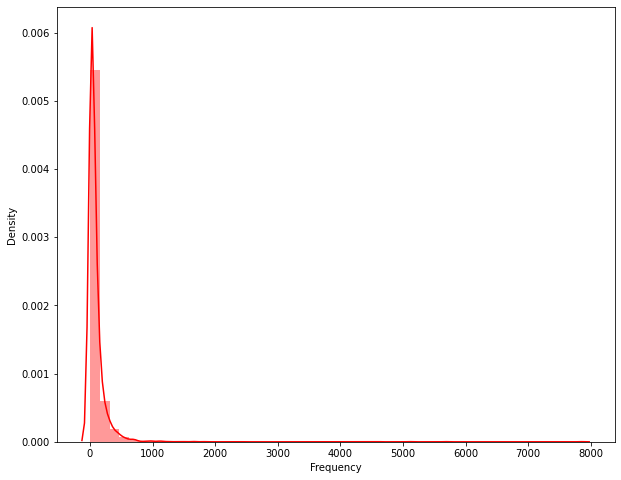

In [ ]:
#Frequency distribution plot, taking observations which have frequency less than 1000
import seaborn as sns
x = rfm_df['Frequency']
plt.figure(figsize=(10,8))
sns.distplot(x,color='r');

In [ ]:
#Descriptive Statistics (Monetary)
rfm_df.Monetary.describe()

count      4339.000000
mean       2053.793018
std        8988.248381
min           0.000000
25%         307.245000
50%         674.450000
75%        1661.640000
max      280206.020000
Name: Monetary, dtype: float64

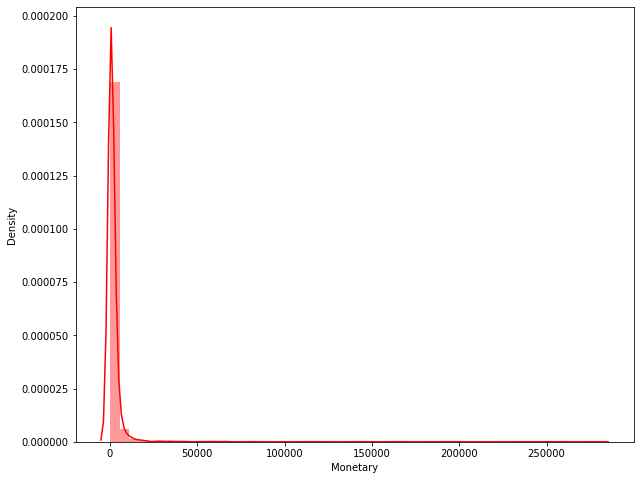

In [ ]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
import seaborn as sns
x = rfm_df['Monetary']
plt.figure(figsize=(10,8))
sns.distplot(x,color='r')

***From all the above graphs of Recency,Frequency and Monetary we can say that all are positively skewed distribution.***

## **Splitting into four segments using quantiles.**

In [ ]:
#Split into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [ ]:
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 307.24499999999995, 0.5: 674.4499999999998, 0.75: 1661.64}}

In [ ]:
#Functions to create R, F and M segments according to quantiles for recency low score is important and for frequency and monetory maximum is important.
#so keeping this in mind we are creating two function to create scores
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


In [ ]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11


In [ ]:
#Handling negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Applying handle_neg_n_zero function to Recency and Monetary columns 
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

#Performing Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

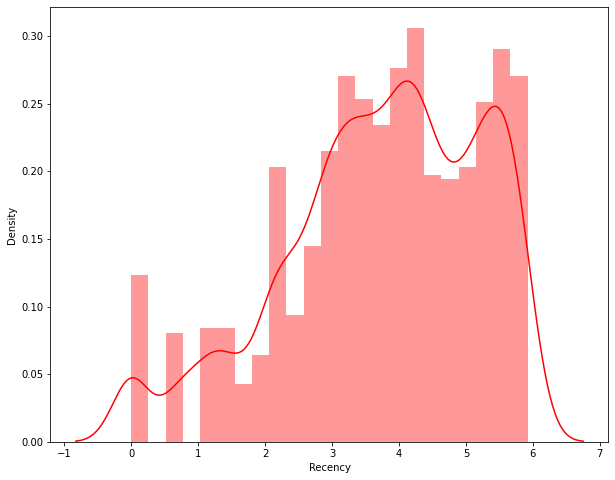

In [ ]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(10,8))
sns.distplot(Recency_Plot,color='r');

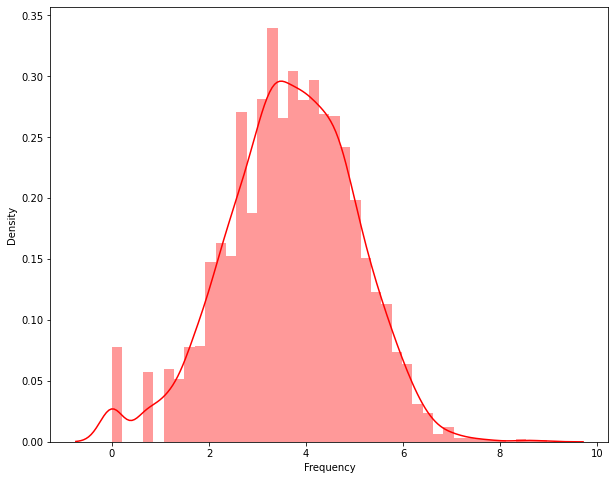

In [ ]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(10,8))
sns.distplot(Frequency_Plot,color='r');

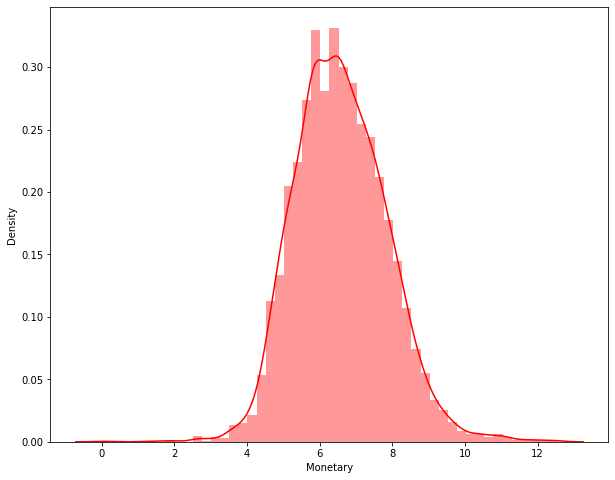

In [ ]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(10,8))
sns.distplot(Monetary_Plot,color='r');

***As we can see from the above plots, skewness has been removed from the data.***



In [ ]:
from sklearn import preprocessing
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

# **Clustering**

### **K-Means Clustering**

**Clustering is an unsupervised classification techinque to understand the groups of classes in the data. We use the K-means clustering algorithm to determine the ideal segments of customers.**

**KMeans requires the number of clusters to be specified during the model building process. To know the right number of clusters, methods such as silhouette analysis and elbow method  can be used. These methods will help in selection of the optimum number of clusters.**

In [ ]:
# Importing libraries necessary for clustering
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

### **Silhouette score method:**

**Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters.**

## **Applying Silhouette Score Method on Recency and Monetary**

In [ ]:
#silhoutte score
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4209365193373542
For n_clusters = 3, silhouette score is 0.3431262320834565
For n_clusters = 4, silhouette score is 0.36435369798998485
For n_clusters = 5, silhouette score is 0.33710394678375116
For n_clusters = 6, silhouette score is 0.3432982593130466
For n_clusters = 7, silhouette score is 0.34507565001647256
For n_clusters = 8, silhouette score is 0.33694332764708584
For n_clusters = 9, silhouette score is 0.3456119738318404
For n_clusters = 10, silhouette score is 0.3480222291727848
For n_clusters = 11, silhouette score is 0.3366893666074234
For n_clusters = 12, silhouette score is 0.3434627257801371
For n_clusters = 13, silhouette score is 0.3401793477351902
For n_clusters = 14, silhouette score is 0.34153299399103415
For n_clusters = 15, silhouette score is 0.3405026416425451


### **Elbow Method:**

**Elbow is one of the most famous methods by which you can select the right value of k and boost your model performance. We also perform the hyperparameter tuning to chose the best value of k. It is an empirical method to find out the best value of k. it picks up the range of values and takes the best among them. It calculates the sum of the square of the points and calculates the average distance.**

## **Applying Elbow Method on Recency and Monetary**

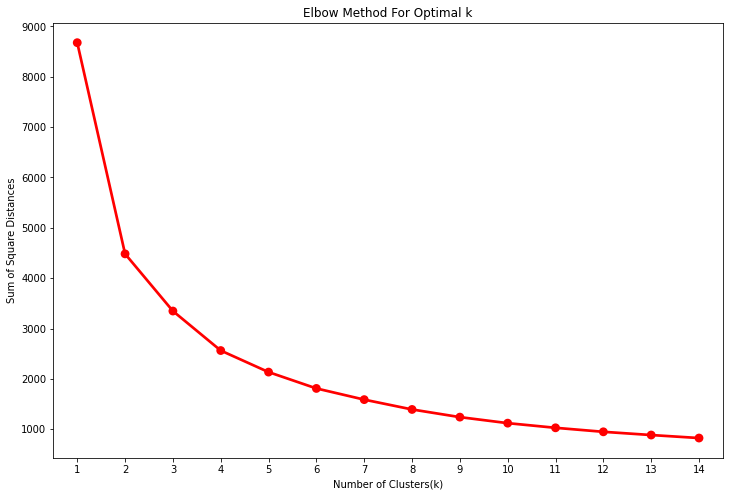

In [ ]:
#applying elbow method
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,8))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()),color='r')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

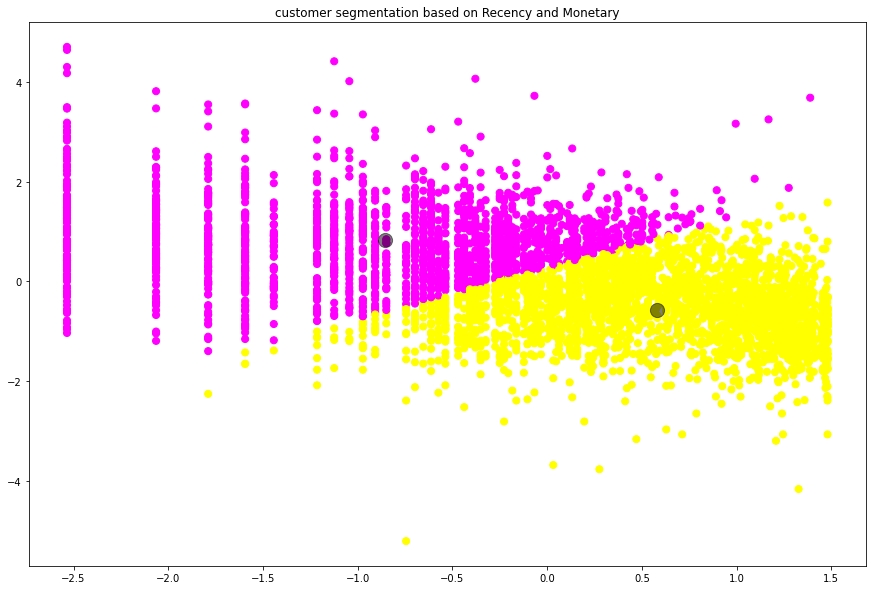

In [ ]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring_r')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

♦ ***Here we can see that, Customers are well separated when we cluster them by Recency and Monetary.***

### **DBSCAN Clustering:**

**DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise.
DBSCAN is a density-based clustering algorithm that works on the assumption that clusters are dense regions in space separated by regions of lower density.It groups ‘densely grouped’ data points into a single cluster.**

## **Applying DBSCAN on Recency and Monetary**

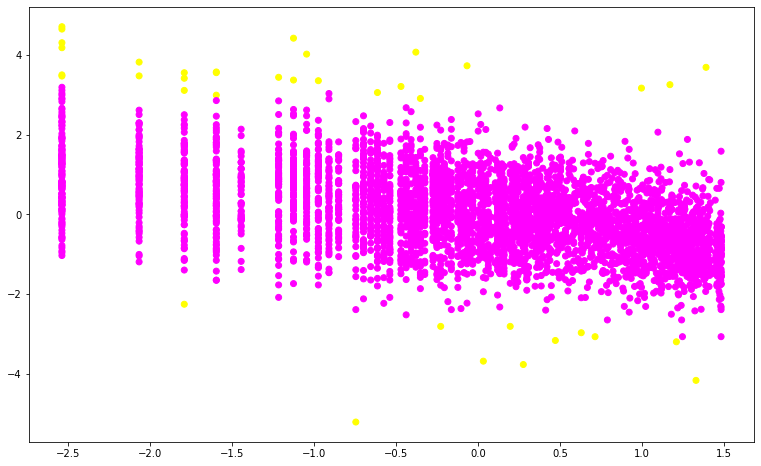

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred,cmap='spring_r');

♦ ***Here we can see that, Customers are separated when we cluster them by Recency and Monetary.***

## **Applying silhouette Score Method on Frquency and Monetary**

In [ ]:
#silhouetee score
features_fre_mon=['Frequency_log','Monetary_log']
X_features_fre_mon=rfm_df[features_fre_mon].values
scaler_fre_mon=preprocessing.StandardScaler()
X_fre_mon=scaler_fre_mon.fit_transform(X_features_fre_mon)
X=X_fre_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4782608772260966
For n_clusters = 3, silhouette score is 0.4074955195276124
For n_clusters = 4, silhouette score is 0.3710613880101635
For n_clusters = 5, silhouette score is 0.3457454745082576
For n_clusters = 6, silhouette score is 0.3597654993555346
For n_clusters = 7, silhouette score is 0.3386790726685561
For n_clusters = 8, silhouette score is 0.3519471883583203
For n_clusters = 9, silhouette score is 0.3462612487192683
For n_clusters = 10, silhouette score is 0.36048056024834263
For n_clusters = 11, silhouette score is 0.36490416706708645
For n_clusters = 12, silhouette score is 0.34922129541844477
For n_clusters = 13, silhouette score is 0.3617844361277993
For n_clusters = 14, silhouette score is 0.3534592580324311
For n_clusters = 15, silhouette score is 0.3431237445784385


## **Applying Elbow Method on Frequency and Monetary**

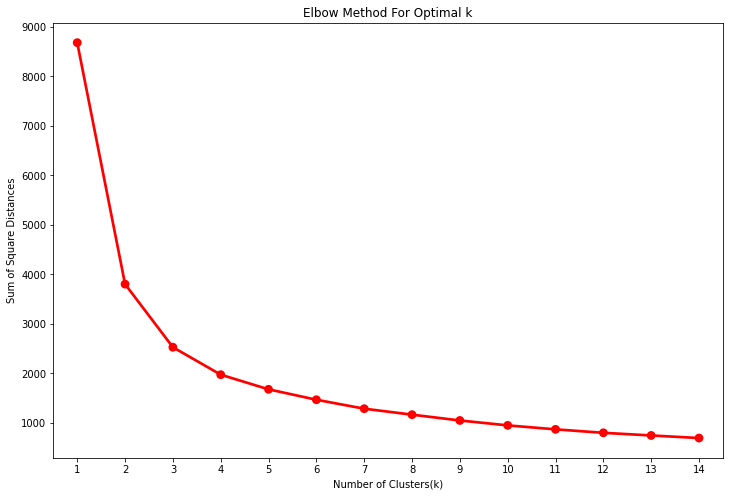

In [ ]:
from sklearn.cluster import KMeans
#applying elbow method
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,8))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()),color='r')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

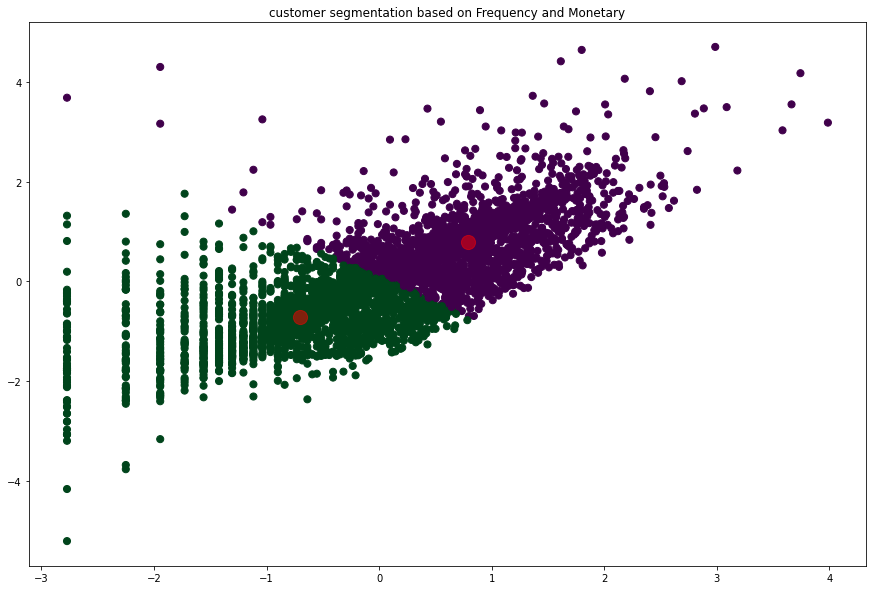

In [ ]:
#plotting graph based on frequency and monetary
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='PRGn')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

♦ ***Here we can see that, Customers are separated when we cluster them by Frequency and Monetary.***

## **Applying DBSCAN to Method on Frquency and Monetary**

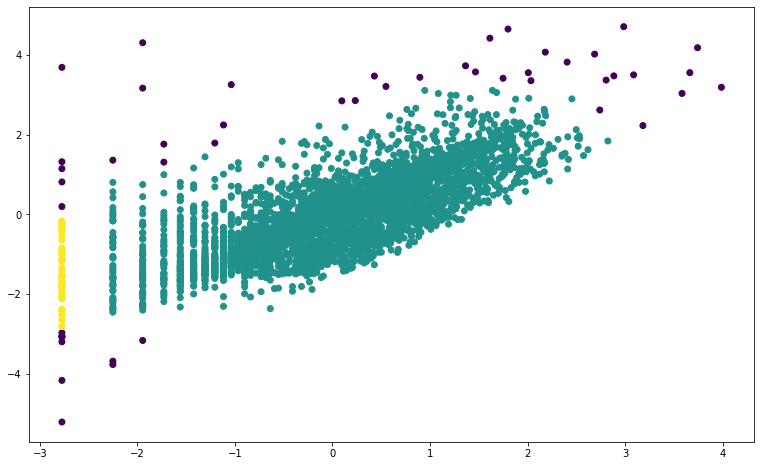

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred);

## **Applying Silhouette Method on Recency, Frequency and Monetary**

In [ ]:
#scaling features
feature_vector=['Recency_log','Frequency_log','Monetary_log']
X_features=rfm_df[feature_vector].values
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X_features)

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.3951770707909246
For n_clusters = 3 The average silhouette_score is : 0.3028168386903721
For n_clusters = 4 The average silhouette_score is : 0.3017123663809571
For n_clusters = 5 The average silhouette_score is : 0.2785661461874347
For n_clusters = 6 The average silhouette_score is : 0.27885758546690703
For n_clusters = 7 The average silhouette_score is : 0.26198642962742774
For n_clusters = 8 The average silhouette_score is : 0.26471675852789284
For n_clusters = 9 The average silhouette_score is : 0.2530153778663923
For n_clusters = 10 The average silhouette_score is : 0.2530579934556927


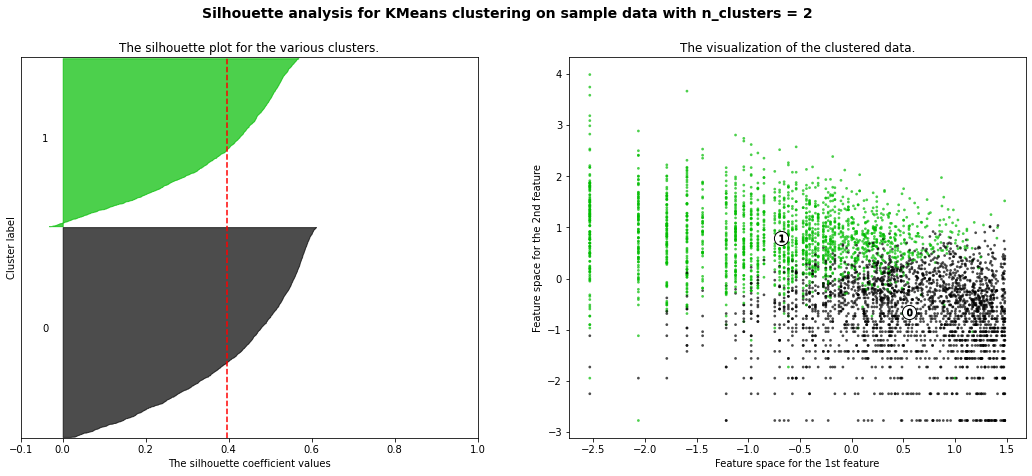

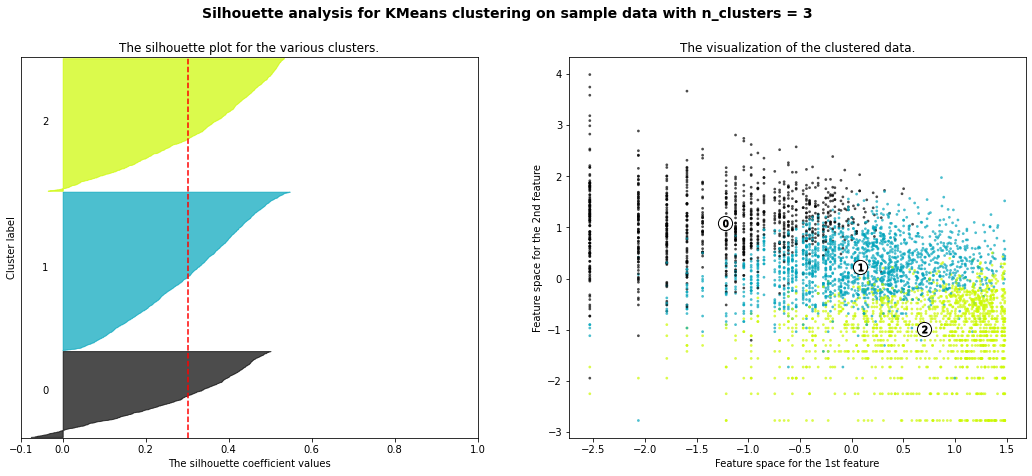

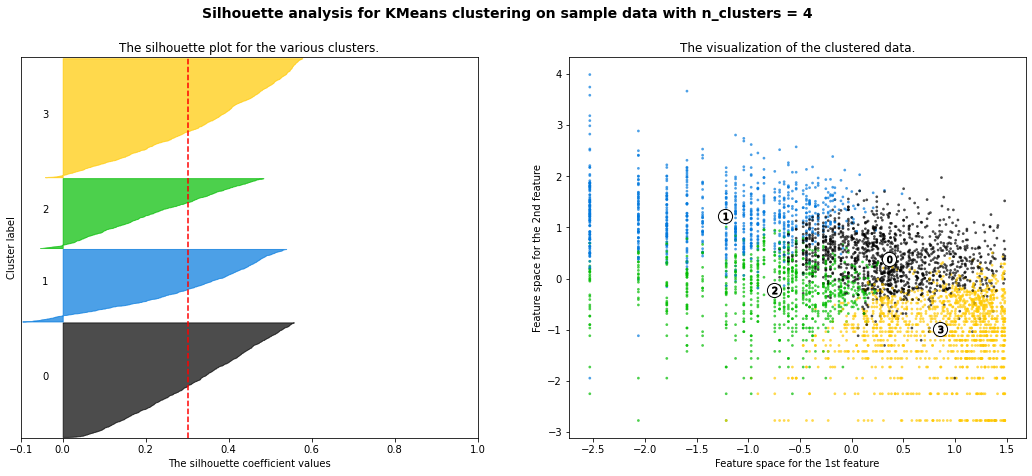

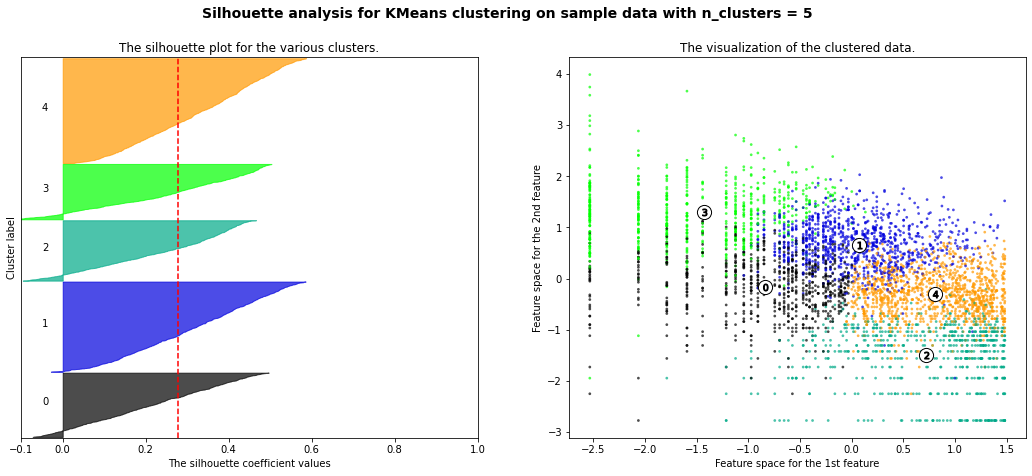

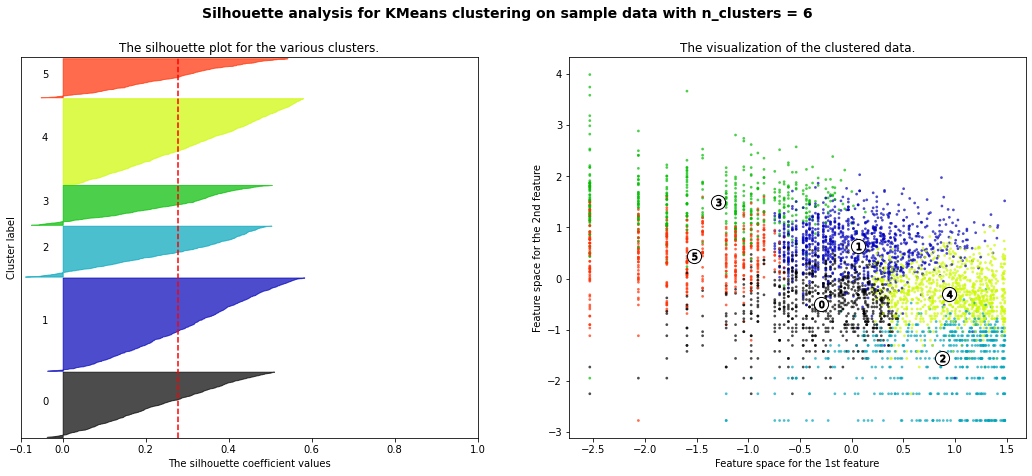

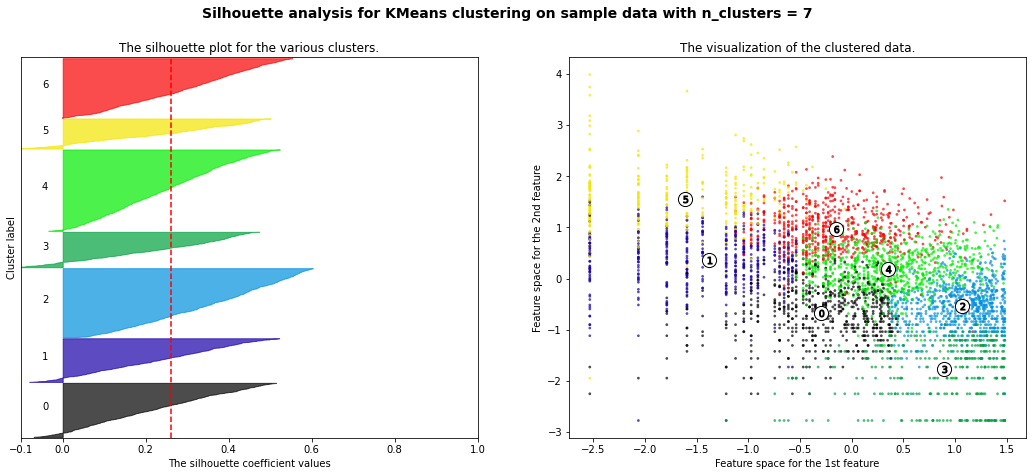

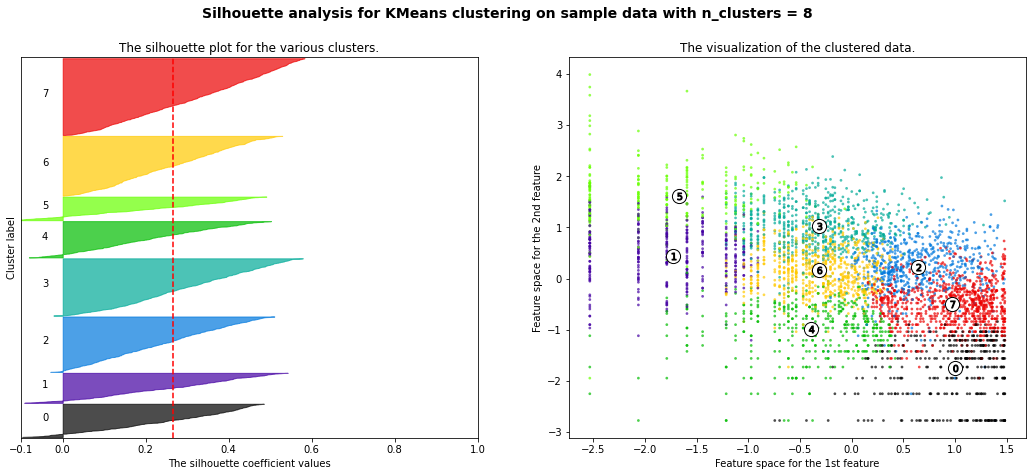

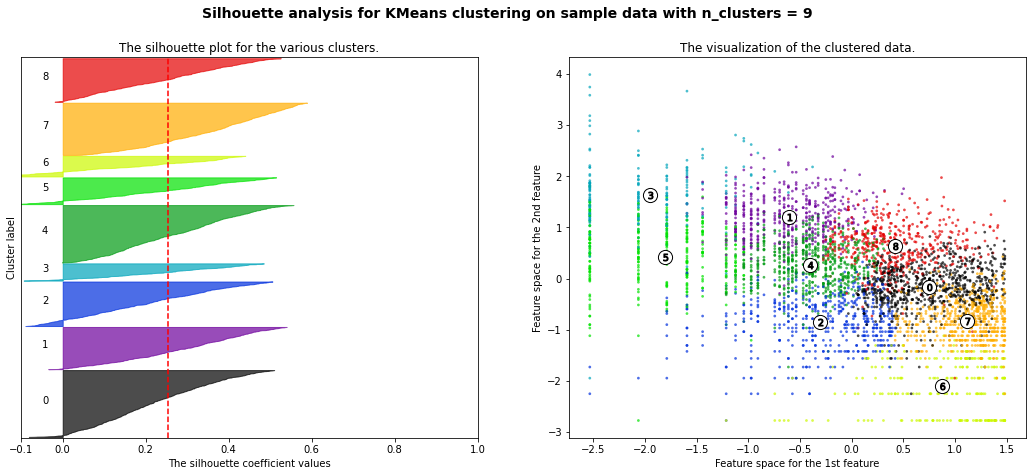

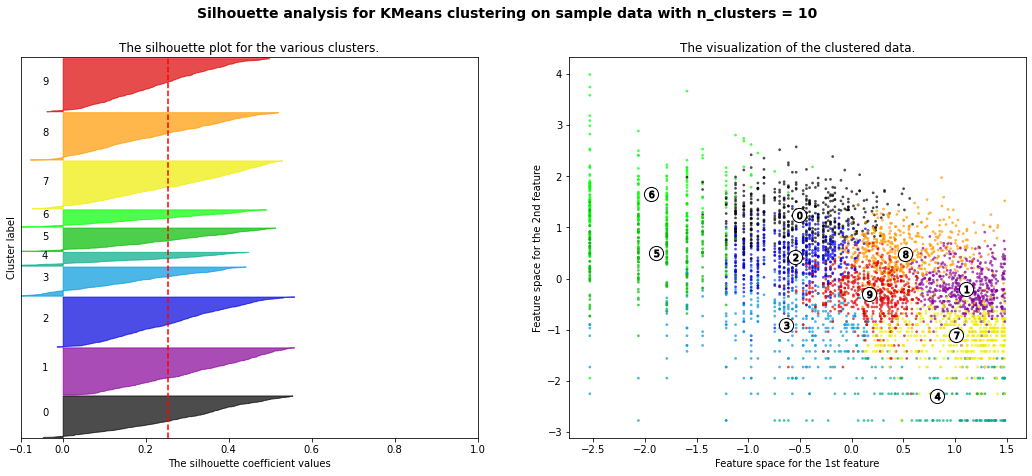

In [ ]:
#applying silhouette method on RFM
range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

***From the silhouette analysis, it is clearly understood that, 2 clusters are performing best. Hence, 2 clusters will be selected to build the KMeans model and classify the customers.***

In [ ]:
# KMeans with 2 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

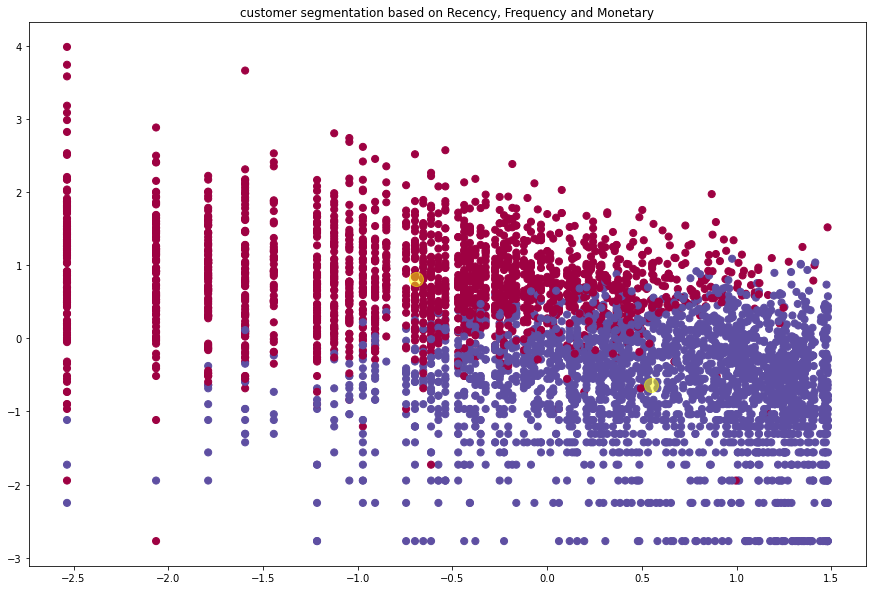

In [ ]:
#plotting figure
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency, Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='Spectral')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5);

 ***Here we can see that, Customers are  separated when we cluster them by Recency, Frequency and Monetary.***

## **Applying Elbow Method on Recency, Frequency and Monetary**

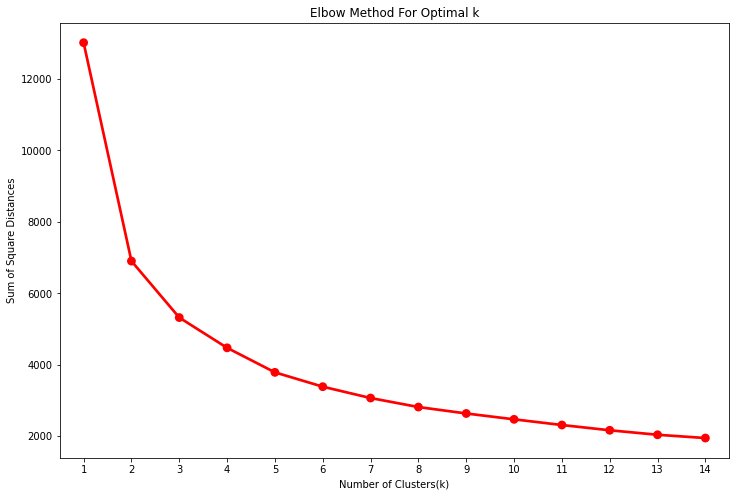

In [ ]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,8))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()),color='r')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

***From the elbow method, it is clearly understood that, 2 clusters are performing best. Hence, 2 clusters will be selected to build the KMeans model and classify the customers.***

## **Applying DBSCAN to Recency, Frequency and Monetary**

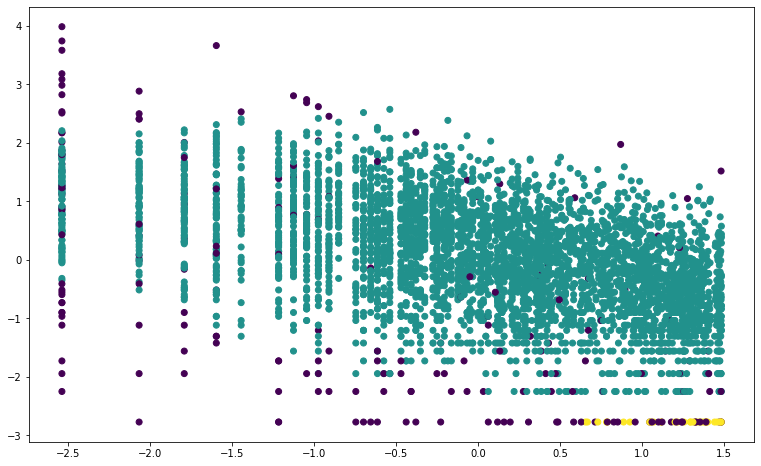

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred);

***Here we can see that, Customers are well separated when we cluster them by Recency, Frequency and Monetary and optimal number of cluster is equal to 3.***

In [ ]:
#Performing K-Means Clustering with 2 clusters
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

#Find the clusters for the observation given in the dataset
rfm_df['Cluster'] = KMean_clust.labels_
#First 10 rows of the RFM dataframe
rfm_df.head(10)

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Recency_log,Frequency_log,Monetary_log,Cluster
CustomerID,,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,5.783825,0.000000,11.253942,0
12347.0,2,182,4310.00,1,1,1,111,3,0.693147,5.204007,8.368693,1
12348.0,75,31,1797.24,3,3,1,331,7,4.317488,3.433987,7.494007,0
12349.0,18,73,1757.55,2,2,1,221,5,2.890372,4.290459,7.471676,1
12350.0,310,17,334.40,4,4,3,443,11,5.736572,2.833213,5.812338,0
12352.0,36,85,2506.04,2,2,1,221,5,3.583519,4.442651,7.826459,1
12353.0,204,4,89.00,4,4,4,444,12,5.318120,1.386294,4.488636,0
12354.0,232,58,1079.40,4,2,2,422,8,5.446737,4.060443,6.984161,0
12355.0,214,13,459.40,4,4,3,443,11,5.365976,2.564949,6.129921,0


In [ ]:
#checking customer belongs to cluter 1
rfm_df[rfm_df['Cluster'] ==1]

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Recency_log,Frequency_log,Monetary_log,Cluster
CustomerID,,,,,,,,,,,,
12347.0,2,182,4310.00,1,1,1,111,3,0.693147,5.204007,8.368693,1
12349.0,18,73,1757.55,2,2,1,221,5,2.890372,4.290459,7.471676,1
12352.0,36,85,2506.04,2,2,1,221,5,3.583519,4.442651,7.826459,1
12356.0,22,59,2811.43,2,2,1,221,5,3.091042,4.077537,7.941449,1
12357.0,33,131,6207.67,2,1,1,211,4,3.496508,4.875197,8.733541,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18260.0,172,134,2643.20,4,1,1,411,6,5.147494,4.897840,7.879746,1
18263.0,25,61,1213.16,2,2,2,222,6,3.218876,4.110874,7.100984,1
18272.0,2,166,3078.58,1,1,1,111,3,0.693147,5.111988,8.032224,1


## **Hierarchical clustering**

**Hierarchical clustering is an unsupervised clustering algorithm which involves creating clusters that have predominant ordering from top to bottom.**

### **Dendogram**

**A Dendrogram is a type of tree diagram showing hierarchical relationships between different sets of data.**

## **Dendogram to find the optimal number of clusters**

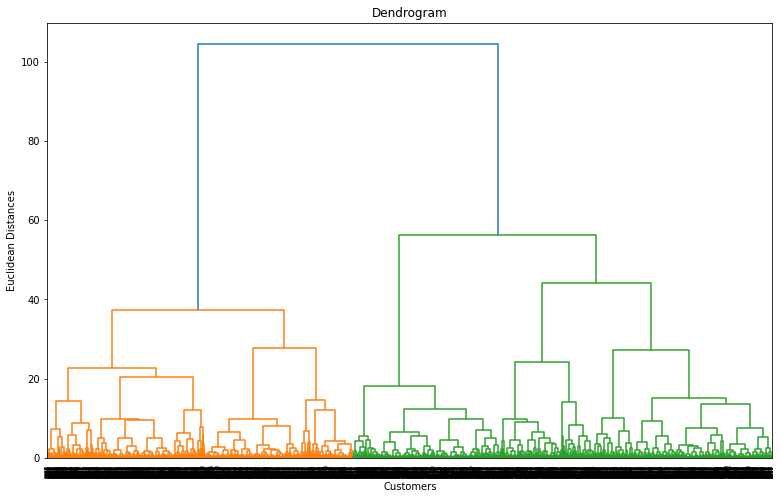

In [ ]:
# Using the dendogram to find the optimal number of clusters
#importing necessary library
import scipy.cluster.hierarchy as sch
# Creating a dendrogram to visualize the clusters
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() 



### **Here, we can see No. of Clusters = 2**

In [ ]:
# Fitting hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

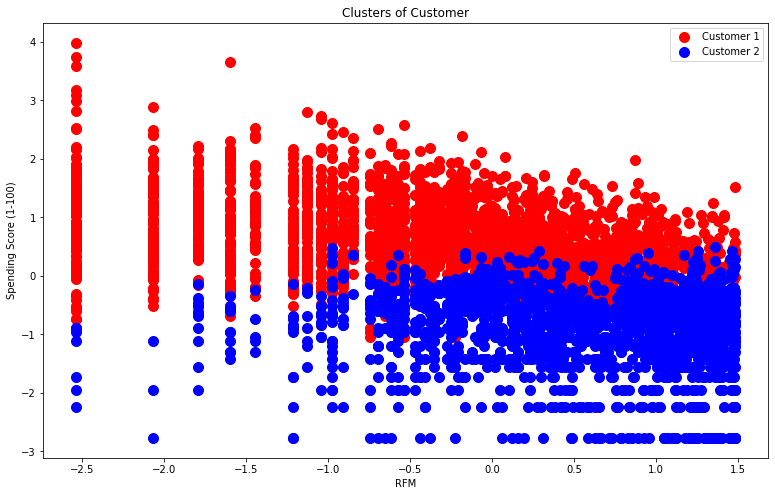

In [ ]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')

plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
#let's check mean values of the cluster for recency, frequnecy and monetary

rfm_df.groupby('Cluster').agg({'Recency':'mean',
                               'Frequency':'mean',
                               'Monetary':'mean'})


,Recency,Frequency,Monetary
Cluster,,,
0,140.922822,24.826141,469.53830
1,30.989632,175.268533,4033.08533


**We can see from above that the customer belongs to cluster 1 are premium customers and we can keep them in comapny's loyalty program and for the customer belongs to cluster 0 we can provide them offer or create some strategies for them so that they will do more transaction with us.**

# **Summary**

In [ ]:
from prettytable import PrettyTable 
  
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(['Sr No.',"Model_Name",'Data', "Optimal_Number_of_cluster"]) 
  
# Add rows 
myTable.add_row(['1',"K-Means with silhouette_score ", "RM", "2"]) 
myTable.add_row(['2',"K-Means with Elbow methos  ", "RM", "2"])
myTable.add_row(['3',"DBSCAN ", "RM", "2"]) 
myTable.add_row(['4',"K-Means with silhouette_score ", "FM", "2"]) 
myTable.add_row(['5',"K-Means with Elbow methos  ", "FM", "2"])
myTable.add_row(['6',"DBSCAN ", "FM", "2"])

myTable.add_row(['7',"K-Means with silhouette_score ", "RFM", "2"]) 
myTable.add_row(['8',"K-Means with Elbow methos  ", "RFM", "2"])
myTable.add_row(['9',"DBSCAN ", "RFM", "3"])
myTable.add_row(['10',"Hierarchical clustering  ", "RFM", "2"])

print(myTable)

+--------+--------------------------------+------+---------------------------+
| Sr No. |           Model_Name           | Data | Optimal_Number_of_cluster |
+--------+--------------------------------+------+---------------------------+
|   1    | K-Means with silhouette_score  |  RM  |             2             |
|   2    |  K-Means with Elbow methos     |  RM  |             2             |
|   3    |            DBSCAN              |  RM  |             2             |
|   4    | K-Means with silhouette_score  |  FM  |             2             |
|   5    |  K-Means with Elbow methos     |  FM  |             2             |
|   6    |            DBSCAN              |  FM  |             2             |
|   7    | K-Means with silhouette_score  | RFM  |             2             |
|   8    |  K-Means with Elbow methos     | RFM  |             2             |
|   9    |            DBSCAN              | RFM  |             3             |
|   10   |   Hierarchical clustering      | RFM  |  

# **Conclusion**





*   ***This project mainly focused on developing customer segments for a UK based online store, selling unique all occasion gifts.*** 




*   ***Using  a recency, frequency and monetary(RFM) analysis, the customers have been segmented into various clusters  and got a silhoutte score of 0.39 for two clusters***





*  ***By applying different clustering algorithm to our dataset, we get the optimal number of cluster is equal to 2.*** 

*   ***The business can focus on these different clusters and provide customer with services of each sector in a different way, which would not only benefit the customers but also the business at large.***

